# Brain-Machine Interface Spike Sorting with PCA

### EE 16B: Designing Information Devices and Systems II, Adapted from Original SVD Lab 

## Table of Contents
* [Task 1: Two Neuron Spike Sorting](#task1)
* [Task 2: Three Neuron Spike Sorting](#task2)
* [Task 3: Determining Neurons](#task3)

## Task 1: Two Neuron Spike Sorting 

## Part a)

We are going to load in several waveforms for each neuron. We have three neurons total. We will refer to these as neurons 1, 2, and 3 respectively.

More specifically:  
Neuron 1 corresponds to the waveforms with name sig118a_wf. These are just a list of many waveforms collected by neuron 1. Each waveform has 32 samples of Neuron 1.   
Neuron 2 corresponds to the waveforms with name sig118b_wf. These are just a list of many waveforms collected by neuron 2. Each waveform has 32 samples of Neuron 1.   
Neuron 3 corresponds to the waveforms with name sig118c_wf. These are just a list of many waveforms collected by neuron 3. Each waveform has 32 samples of Neuron 1.   

In [1]:
%matplotlib inline
# %matplotlib notebook
import numpy as np
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
presorted = {k: v for k, v in scipy.io.loadmat('spike_waveforms').items() \
             if k in ('sig118a_wf', 'sig118b_wf', 'sig118c_wf')}

# We are defining this list for plotting convenience later. Safe to ignore for the most part.
presorted_list = [presorted['sig118a_wf'], presorted['sig118b_wf'], presorted['sig118c_wf']]

In [2]:
# We can append all these waveforms into a huge matrix with 32 columns (1 column for each sample)
presorted_two_neurons = np.concatenate([presorted['sig118b_wf'], presorted['sig118c_wf']])
presorted_three_neurons = np.concatenate([presorted['sig118a_wf'], presorted['sig118b_wf'], presorted['sig118c_wf']])

In [3]:
def _make_training_set(data):
    """ Separate data set into 2 sets. 
    1/6 of the dataset is training set and the rest is test set
    Parameter:
        data: waveform data (width = number of samples per spike)
    """
    n = data.shape[0]
    idx_training = np.random.choice(n, n//6, replace=False)
    training_set = data[idx_training]
    idx_test = [i for i in range(n) if i not in idx_training]
    test_set = data[idx_test]
   
    return training_set, test_set

# Create training and testing dataset
two_neurons_training, two_neurons_test = _make_training_set(presorted_two_neurons)
three_neurons_training, three_neurons_test = _make_training_set(presorted_three_neurons)

print("Training data shape:", three_neurons_training.shape)

Training data shape: (4398, 32)


To get an idea of what the data looks like, let us plot 1 row of the `two_neruons_training` matrix and print/plot it out

Printing First Row of 2 Neuron Training Set:
[ -23   70  205  316  269   -5 -437 -816 -948 -814 -537 -242   14  220
  373  449  445  394  370  422  506  512  396  244  156   98  -32 -231
 -358 -308 -193 -179] 



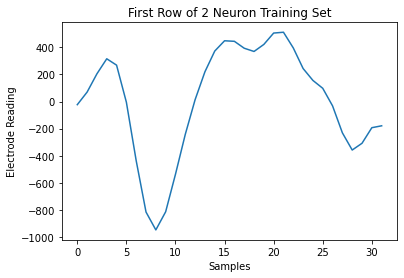

In [4]:
first_row = two_neurons_training[0,:]
print("Printing First Row of 2 Neuron Training Set:")
print(first_row, '\n')
plt.title("First Row of 2 Neuron Training Set")
plt.xlabel('Samples')
plt.ylabel('Electrode Reading')
plt.plot(first_row)

So, this is what one reading looks like. What we have is a mixture of two types of neurons and their waveforms stored in the rows of `two_neurons_training`. Similarly, we have three types of neuruns and their waveforms in the rows of `three_neurons_training`. 

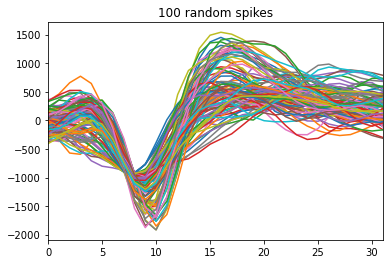

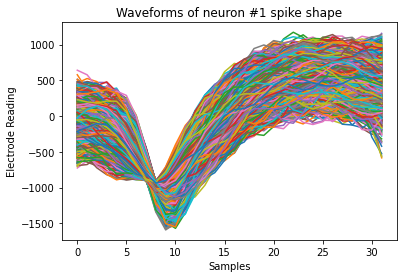

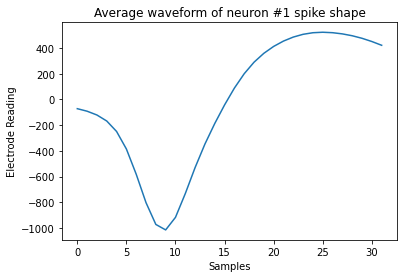

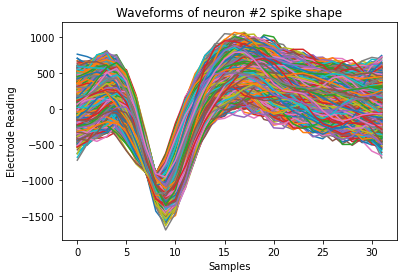

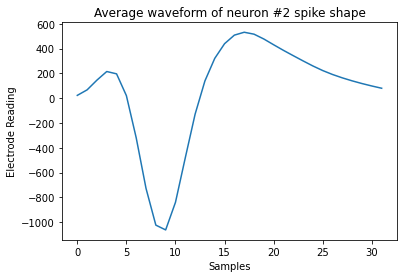

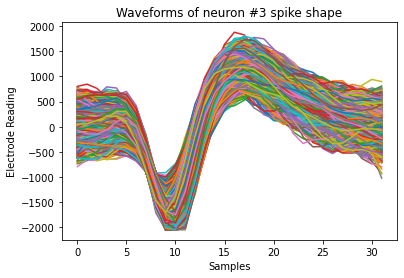

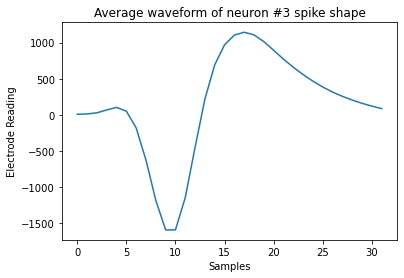

<Figure size 432x288 with 0 Axes>

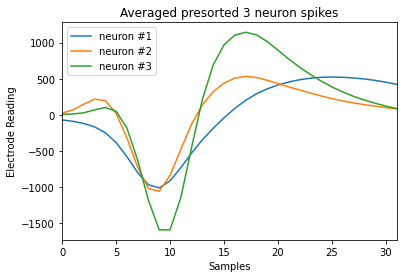

In [5]:
# Plot 100 random spikes
# This may take several minutes to run
for waveforms in three_neurons_training[:100]:
    plt.plot(waveforms)
plt.xlim((0,31))
plt.title('100 random spikes')
plt.figure()

# Plot the 3 spike shapes based on the presorted data
neuron_num = 1
for waveforms in presorted_list:
    plt.title(f"Waveforms of neuron #{neuron_num} spike shape")
    plt.plot(waveforms.T)
    plt.xlabel('Samples')
    plt.ylabel('Electrode Reading')
    plt.figure()
    plt.title(f"Average waveform of neuron #{neuron_num} spike shape")
    plt.plot(np.mean(waveforms, axis=0))
    plt.xlabel('Samples')
    plt.ylabel('Electrode Reading')
    plt.figure()
    neuron_num += 1
    
plt.figure()   
neuron_num = 1
for waveforms in presorted_list:
    plt.plot(np.mean(waveforms, axis=0), label=f'neuron #{neuron_num}')
    plt.xlabel('Samples')
    plt.ylabel('Electrode Reading')
    neuron_num += 1
plt.xlim((0,31))
plt.title('Averaged presorted 3 neuron spikes')
plt.legend()

You will be using <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html">np.linalg.svd</a> in your PCA function. Read the documentation for this function to figure out how to choose the principal components used as the basis for the lower dimensional space. (Note: in the docs, `a.H` means the congugate transpose of a).

## Part e)

In [6]:
def PCA_train(training_set, n_components):
    """ Use np.linalg.svd to perform PCA
    Parameters:
        training_set: the data set to perform PCA on (MxN)
        n_components: the dimensionality of the basis to return (i.e. number of neurons)
    Returns: 
        The n_components principal components with highest significants
    """    
    
    # Our data (each signal waveform) is stored in the rows of the training set.
    # For that reason, our principal components will be the columns of V (rows of Vt).
    # So, we can grab the first n_components columns of V as our principal components.
    U, s, Vt = np.linalg.svd(training_set)
    # We need to grab the first n_components columns of V. 
    # Same thing as grabing the first n_components rows of Vt and then transposing.
    basis_components = Vt[:n_components].T
    
    return basis_components

def PCA_project(data, principle_components):
    """ Project the data set into the new basis vectors
    Parameters:
        data: data to project (MxN)
        principle_components: Our k principal components as column vectors (Nxk)
    Returns: 
        Data projected onto new_basis (MxK)
    """
    # SOLN START #
    return np.dot(data, principle_components)
    # SOLN END #

## Part f)

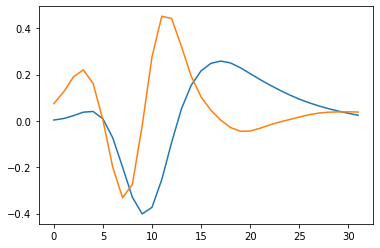

In [7]:
# Perform PCA and plot the first 2 principal components.

# YOUR CODE HERE
# BEGIN SOLN
two_new_basis_2pcs = PCA_train(two_neurons_training, 2)
# END SOLN

# Plot the basis components
for comp in two_new_basis_2pcs.T:
    plt.plot(comp)

Elaborate one random projections/directions

## Part g)

Text(0, 0.5, 'Projection onto 2nd Principal Component')

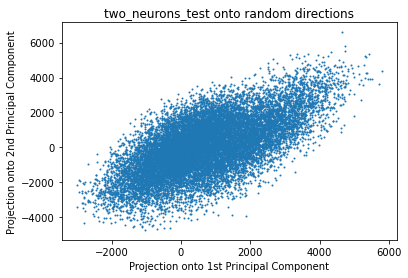

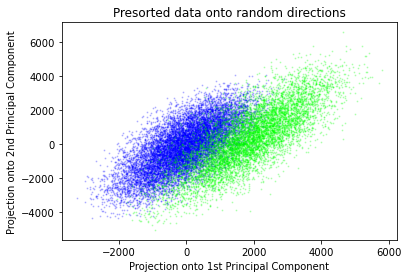

In [8]:
random_directions = np.random.randint(2, size=(32, 2))

two_projected = PCA_project(two_neurons_test, random_directions)

# Plot the projected neurons
plt.figure()
plt.scatter(*two_projected.T, s=1)
plt.title('two_neurons_test onto random directions')
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')

# Project the presorted data and plot it
plt.figure()
presorted_two_projected = [PCA_project(spikes, random_directions) for spikes in presorted_list[1:]]
colors = ['#0000ff', '#00ff00']
for dat, color in zip(presorted_two_projected, colors):
    plt.scatter(*dat.T, c=color, alpha=0.2,s=1)
plt.title('Presorted data onto random directions')
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')

## Part h)

Text(0, 0.5, 'Projection onto 2nd Principal Component')

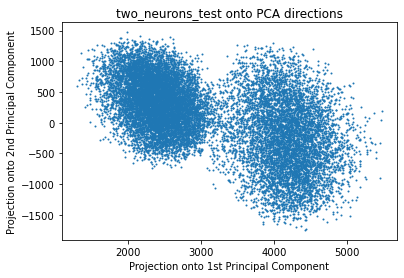

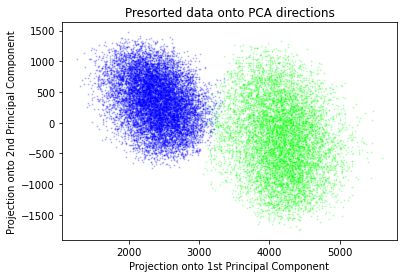

In [9]:
# Project the test data two_neurons_test to the basis you found earlier

# YOUR CODE HERE #
# SOLN START #
two_projected = PCA_project(two_neurons_test, two_new_basis_2pcs)
# SOLN END #

# Plot the projected neurons
plt.figure()
plt.scatter(*two_projected.T,s=1)
plt.title('two_neurons_test onto PCA directions')
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')

# Project the presorted data and plot it
plt.figure()
presorted_two_projected = [PCA_project(spikes, two_new_basis_2pcs) for spikes in presorted_list[1:]]
colors = ['#0000ff', '#00ff00']
for dat, color in zip(presorted_two_projected, colors):
    plt.scatter(*dat.T, c=color, s=1, alpha=0.2)
plt.title('Presorted data onto PCA directions')
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')

## Part i)

We have projected the 2 neuron set onto 2 principal components. Lets see what happens if we project the 2 neruon set onto 3 principal components.

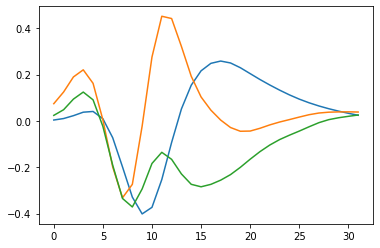

In [10]:
# Perform PCA and plot the first 3 principal components.

two_new_basis_3pcs = PCA_train(two_neurons_training, 3)

# Plot the basis components
for comp in two_new_basis_3pcs.T:
    plt.plot(comp)

Text(0.5, 0, 'Projection onto 3rd Principal Component')

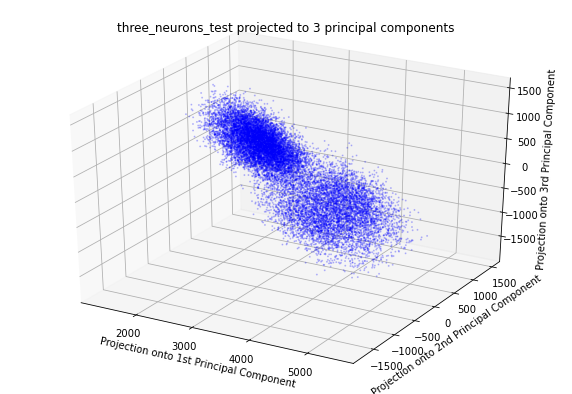

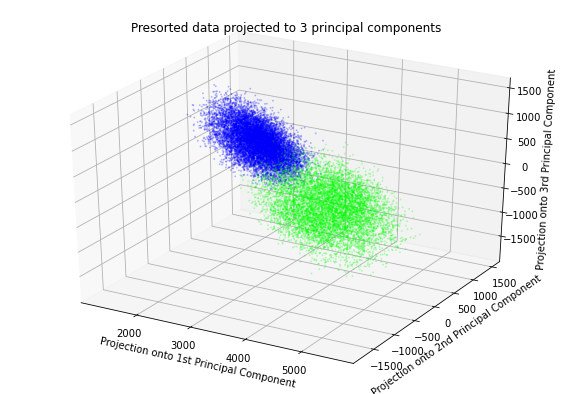

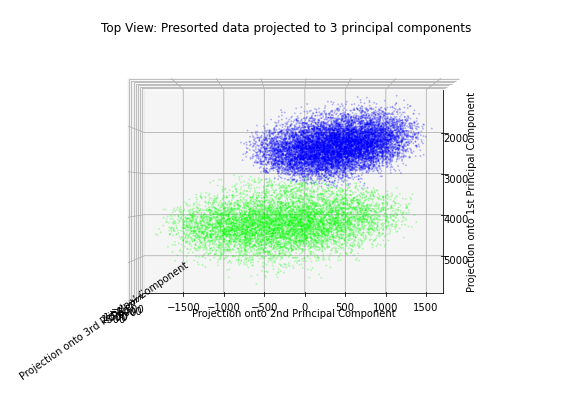

In [11]:
def plot_3D(data, view_from_top=False):
    """ Takes list of arrays (x, y, z) coordinate triples
    One array of triples per color
    """
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['#0000ff', '#00ff00', '#ff0000']
    for dat, color in zip(data, colors):
        Axes3D.scatter(ax, *dat.T, s=1, c=color, alpha=0.2)
    if view_from_top:
        ax.view_init(elev=90.,azim=0)                # Move perspective to view from top
    return ax

        
# Classify the two_neurons_test data based on the basis computed above
two_projected_3pcs = PCA_project(two_neurons_test, two_new_basis_3pcs)

# Plot the resulting projection
ax = plot_3D([two_projected_3pcs], False)
plt.title('three_neurons_test projected to 3 principal components')
ax.set_xlabel('Projection onto 1st Principal Component')
ax.set_ylabel('Projection onto 2nd Principal Component')
ax.set_zlabel('Projection onto 3rd Principal Component')

presorted_projected = [PCA_project(spikes, two_new_basis_3pcs) for spikes in presorted_list[1:]]
ax = plot_3D(np.array(presorted_projected), False)
plt.title('Presorted data projected to 3 principal components')
ax.set_xlabel('Projection onto 1st Principal Component')
ax.set_ylabel('Projection onto 2nd Principal Component')
ax.set_zlabel('Projection onto 3rd Principal Component')

ax = plot_3D(np.array(presorted_projected), True)
plt.title('Top View: Presorted data projected to 3 principal components')
ax.set_xlabel('Projection onto 1st Principal Component')
ax.set_ylabel('Projection onto 2nd Principal Component')
ax.set_zlabel('Projection onto 3rd Principal Component')

Note that the first principal component separates the two neurons in the $x$-axis. Thus, technically we only need 1 principal component to separate the two neurons. This is because the algorithm maximizes the square of the dot product of each signal with the principal component, which results in a large positive dot product with 1 neuron and a large negative dot product with the other.

## Task 2: Three Neuron Spike Sorting

## Part j)

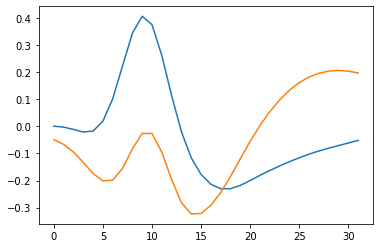

In [12]:
# Train with three neuron data, producing 2 principal components

# YOUR CODE HERE
# BEGIN SOLN
three_new_basis_2pcs = PCA_train(three_neurons_training, 2)
# END SOLN

# Plot the resulting basis
for comp in three_new_basis_2pcs.T:
    plt.plot(comp)

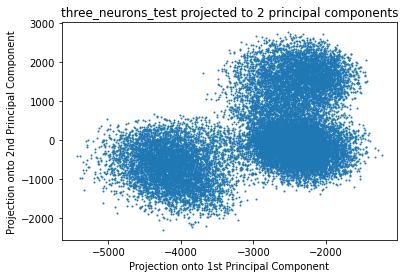

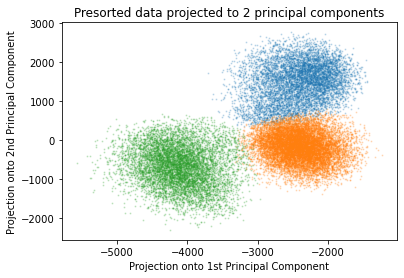

In [13]:
# Project datapoints on the principal components
basis = three_new_basis_2pcs[:,:2]
three_projected_2pcs = PCA_project(three_neurons_test, basis)
presorted_projected_2pcs = [PCA_project(spikes, basis) for spikes in presorted_list]


# Plot the resulting projection
plt.title("three_neurons_test projected to 2 principal components")
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')
plt.scatter(three_projected_2pcs.T[0], three_projected_2pcs.T[1], s=1)
plt.figure()

plt.title("Presorted data projected to 2 principal components")
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')
for p in presorted_projected_2pcs:
    plt.scatter(p.T[0], p.T[1], s=1, alpha=0.2)

## Part k)

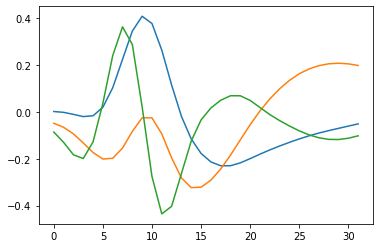

In [14]:
# Repeat training with three neuron data, producing 3 principal components

# YOUR CODE HERE
# BEGIN SOLN
three_new_basis_3pcs = PCA_train(three_neurons_training, 3)
# END SOLN

# Plot the resulting basis
for comp in three_new_basis_3pcs.T:
    plt.plot(comp)

Text(0.5, 0, '3rd Direction Projection')

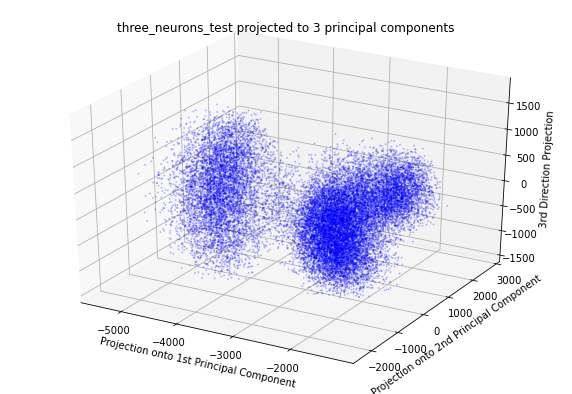

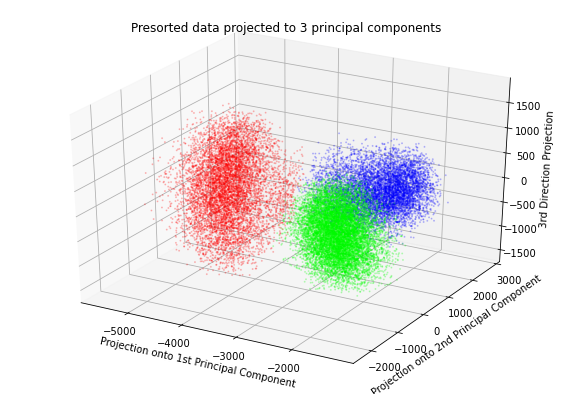

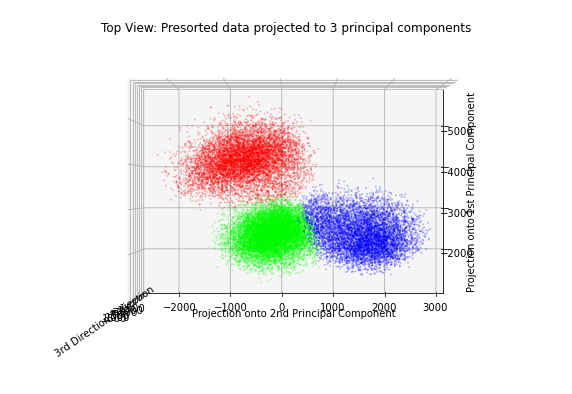

In [15]:
def plot_3D(data, view_from_top=False):
    """ Takes list of arrays (x, y, z) coordinate triples
    One array of triples per color
    """
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['#0000ff', '#00ff00', '#ff0000']
    for dat, color in zip(data, colors):
        Axes3D.scatter(ax, *dat.T, s=1, c=color, alpha=0.2)
    if view_from_top:
        ax.view_init(elev=90.,azim=0)                # Move perspective to view from top
    return ax

        
# Classify the three_neurons_test data based on the basis computed above
# YOUR CODE HERE #
# BEGIN SOLN #
three_projected_3pcs = PCA_project(three_neurons_test, three_new_basis_3pcs)
# END SOLN #

# Plot the resulting projection
ax = plot_3D([three_projected_3pcs], False)
plt.title('three_neurons_test projected to 3 principal components')
ax.set_xlabel('Projection onto 1st Principal Component')
ax.set_ylabel('Projection onto 2nd Principal Component')
ax.set_zlabel('3rd Direction Projection')

presorted_projected_3pcs = [PCA_project(spikes, three_new_basis_3pcs) for spikes in presorted_list]
ax = plot_3D(np.array(presorted_projected_3pcs), False)
plt.title('Presorted data projected to 3 principal components')
ax.set_xlabel('Projection onto 1st Principal Component')
ax.set_ylabel('Projection onto 2nd Principal Component')
ax.set_zlabel('3rd Direction Projection')

ax = plot_3D(np.array(presorted_projected_3pcs), True)
plt.title('Top View: Presorted data projected to 3 principal components')
ax.set_xlabel('Projection onto 1st Principal Component')
ax.set_ylabel('Projection onto 2nd Principal Component')
ax.set_zlabel('3rd Direction Projection')

Change the second argument to the `plot_3D` function calls above to True to view the plots "from the top" (i.e. looking down the positive z axis).



## Task 3: Determining Neurons

## Part m) OPTIONAL

In [16]:
# Find the centroids of the presorted data
#YOUR CODE HERE
# SOLN START #
centroid1 = np.mean(presorted_two_projected[0], axis=0)
centroid2 = np.mean(presorted_two_projected[1], axis=0) 
# SOLN END #

print("Centroid 1:", centroid1)
print("Centroid 2:", centroid2)

Centroid 1: [2396.21265657  355.1046755 ]
Centroid 2: [4165.79765893 -259.76520798]


In [17]:
def which_neuron(data_point, centroid1, centroid2):
    """ Determine which centroid is closest to the data point
    Inputs:
        data_point: 1x2 array containing x/y coordinates of data point
        centroid1: 1x2 array containing x/y coordinates of centroid 1
        centroid2: 1x2 array containing x/y coordinates of centroid 2
    Returns: 
        The index of the centroid closest to the data point
    """
    
    dist1 = np.linalg.norm(data_point - centroid1)
    dist2 = np.linalg.norm(data_point - centroid2)
    
    if dist1 >= dist2:
    # YOUR CODE HERE
    # SOLN START #
        return 2
    else:
        return 1
    # SOLN END #

Neuron 2 identified 9753.0 times
Neuron 3 identified 6378.0 times


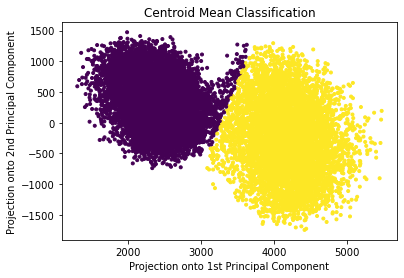

In [18]:
num_of_firings = np.zeros(2)
label_arr = []
for i in range(0,len(two_projected)):
    neuron_number = which_neuron(two_projected[i], centroid1, centroid2)
    label_arr.append(neuron_number)
    num_of_firings[neuron_number-1] +=1

print('Neuron 2 identified ' + str(num_of_firings[0]) + ' times')
print('Neuron 3 identified ' + str(num_of_firings[1]) + ' times')

plt.title('Centroid Mean Classification')
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')
plt.scatter(two_projected[:,0], two_projected[:,1],  c=label_arr, marker='.')

In [19]:
def find_centroids(clustered_data, num_of_clusters):
    """ Use scipy.cluster.vq.kmeans to determine centroids of clusters
    Parameters:
        clustered_data: the data projected onto the new basis
        num_of_clusters: the expected number of clusters in the data
    Returns: 
        The centroids of the clusters
    Hint 1: make sure to first 'whiten' the data (refer to docs)
    """
    
    return scipy.cluster.vq.kmeans(clustered_data, num_of_clusters)[0]

Centroid 1: [2408.42762062  358.43439204]
Centroid 2: [4180.8940151  -273.62959524]
Neuron 2 identified 9769.0 times
Neuron 3 identified 6362.0 times
Remember, the order of the two clusters has no meaning. Their centroids are what define them.


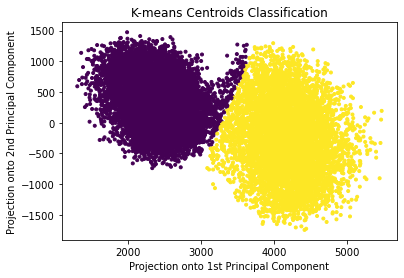

In [20]:
# Determine the centroids in the 2-neuron data
centroid_list = find_centroids(two_projected, 2)

# Print the centroid locations
centroid1 = centroid_list[0]
centroid2 = centroid_list[1]

print("Centroid 1:", centroid1)
print("Centroid 2:", centroid2)

# Determine how many times neuron1 and neuron2 fired in the two_classifed data

num_of_firings = np.zeros(2)
label_arr = []
for i in range(0,len(two_projected)):
    # YOUR CODE START
    # SOLN START #
    neuron_number = which_neuron(two_projected[i], centroid1, centroid2)
    # SOLN END
    # END YOUR CODE
    num_of_firings[neuron_number-1] +=1  
    label_arr.append(neuron_number)
    
# Print the results
print('Neuron 2 identified ' + str(num_of_firings[0]) + ' times')
print('Neuron 3 identified ' + str(num_of_firings[1]) + ' times')

print('Remember, the order of the two clusters has no meaning. Their centroids are what define them.')

plt.title('K-means Centroids Classification')
plt.xlabel('Projection onto 1st Principal Component')
plt.ylabel('Projection onto 2nd Principal Component')
plt.scatter(two_projected[:,0], two_projected[:,1],  c=label_arr, marker='.')